# Analyze Financial Data Capstone Project from Codecademy

## In this project I will analyze the following stocks for a portfolio:

- Apple
- Microsoft
- Tesla
- Amazon
- BYD
- NIO
- Biontech
- Netflix
- Disney

## Importing / Downloading Data

The financial data you use in this project is up to you. You can access financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance. Make sure to find data for at least, but not limited to, four (4) stocks to include in your analysis.

Load the data into a pandas DataFrame so you can easily view and manipulate the data.

In [1]:
# Importing Tools for work
import pandas as pd
import numpy as np
import datetime
import random
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

# Importing the Data from Yahoo Finance API
# The data ranges from Jan 01, 2020 to May 01, 2021
stocks = ["AAPL", "MSFT", "TSLA", "AMZN", "BYDDF", "NIO", "BNTX", "NFLX", "DIS"]
stocks_data = web.get_data_yahoo(stocks, start = "2017-06-01", end = "2021-06-01")

print(stocks_data.head())

Attributes  Adj Close                                                        \
Symbols          AAPL       MSFT       TSLA         AMZN     BYDDF NIO BNTX   
Date                                                                          
2017-06-01  36.459702  66.195580  68.073997   995.950012  5.951097 NaN  NaN   
2017-06-02  36.999996  67.763138  67.970001  1006.729980  5.881435 NaN  NaN   
2017-06-05  36.638210  68.254150  69.463997  1011.340027  6.010807 NaN  NaN   
2017-06-06  36.761978  68.480789  70.570000  1003.000000  6.020759 NaN  NaN   
2017-06-07  36.980961  68.358040  71.930000  1010.070007  6.020759 NaN  NaN   

Attributes                              Close  ...        Open       Volume  \
Symbols           NFLX         DIS       AAPL  ...         DIS         AAPL   
Date                                           ...                            
2017-06-01  162.990005  103.624084  38.294998  ...  107.730003   65616400.0   
2017-06-02  165.179993  102.637733  38.862499  ... 

## Calculate Financial Statistics

Calculate some of the financial statistics you have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?

### Adjusted Daily Closing Prices

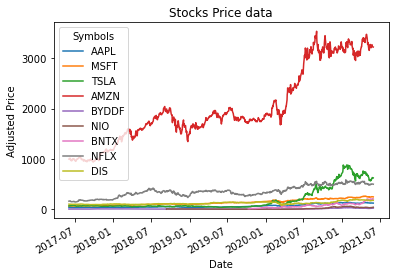

In [2]:
# Taking the ADJ Closing Prices and plot them in a graph
stocks_data['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.title("Stocks Price data")
plt.rcParams['figure.figsize'] = [32, 20]
plt.rcParams.update({'font.size': 22})

plt.savefig("stocks_price_data.png")
plt.show()

### Adjusted Daily Closing Prices Seperated

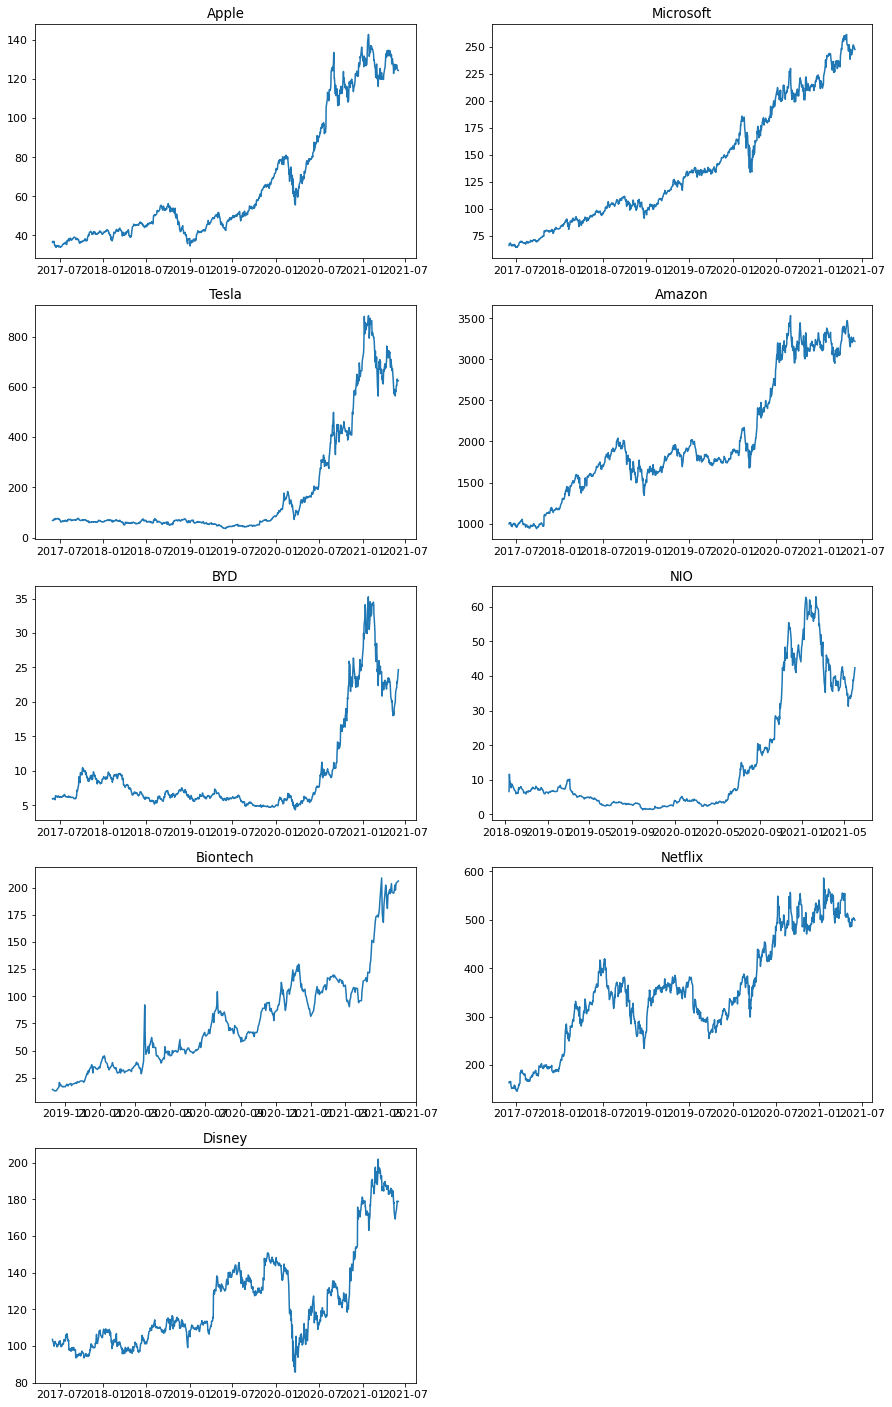

In [3]:
# Taking the ADJ Closing Prices in subplots for every stock
# creating figure and size it
fig = plt.figure(figsize = (32, 20))
plt.rcParams.update({'font.size': 11})
fig.set_figheight(25)
fig.set_figwidth(15)
months = ["Jan-20", "Mar-20", "May-20", "Jul-20", "Sep-20", "Nov-20", "Jan-21", "Mar-21", "May-21"]

# Creating subplots
ax1 = fig.add_subplot(521)
ax2 = fig.add_subplot(522)
ax3 = fig.add_subplot(523)
ax4 = fig.add_subplot(524)
ax5 = fig.add_subplot(525)
ax6 = fig.add_subplot(526)
ax7 = fig.add_subplot(527)
ax8 = fig.add_subplot(528)
ax9 = fig.add_subplot(529)
ax1.plot(stocks_data['Adj Close']['AAPL'])
ax1.set_title("Apple")
#ax1.set_xticklabels(months)
ax2.plot(stocks_data['Adj Close']['MSFT'])
ax2.set_title("Microsoft")
#ax2.set_xticklabels(months)
ax3.plot(stocks_data['Adj Close']['TSLA'])
ax3.set_title("Tesla")
#ax3.set_xticklabels(months)
ax4.plot(stocks_data['Adj Close']['AMZN'])
ax4.set_title("Amazon")
#ax4.set_xticklabels(months)
ax5.plot(stocks_data['Adj Close']['BYDDF'])
ax5.set_title("BYD")
#ax5.set_xticklabels(months)
ax6.plot(stocks_data['Adj Close']['NIO'])
ax6.set_title("NIO")
#ax6.set_xticklabels(months)
ax7.plot(stocks_data['Adj Close']['BNTX'])
ax7.set_title("Biontech")
#ax7.set_xticklabels(months)
ax8.plot(stocks_data['Adj Close']['NFLX'])
ax8.set_title("Netflix")
#ax8.set_xticklabels(months)
ax9.plot(stocks_data['Adj Close']['DIS'])
ax9.set_title("Disney")
#ax9.set_xticklabels(months)

plt.savefig("stocks_adj_sep.png")
plt.show()

### Percentage change in stock prices

In [4]:
# Closing Price
adj_price = stocks_data["Adj Close"]
print(adj_price.head())

# Log of percentage change
log_stocks_data = adj_price.pct_change().apply(lambda x: np.log(1+x))
print(log_stocks_data.head())

Symbols          AAPL       MSFT       TSLA         AMZN     BYDDF  NIO  BNTX  \
Date                                                                            
2017-06-01  36.459702  66.195580  68.073997   995.950012  5.951097  NaN   NaN   
2017-06-02  36.999996  67.763138  67.970001  1006.729980  5.881435  NaN   NaN   
2017-06-05  36.638210  68.254150  69.463997  1011.340027  6.010807  NaN   NaN   
2017-06-06  36.761978  68.480789  70.570000  1003.000000  6.020759  NaN   NaN   
2017-06-07  36.980961  68.358040  71.930000  1010.070007  6.020759  NaN   NaN   

Symbols           NFLX         DIS  
Date                                
2017-06-01  162.990005  103.624084  
2017-06-02  165.179993  102.637733  
2017-06-05  165.059998  102.005707  
2017-06-06  165.169998  101.028938  
2017-06-07  165.610001  101.431129  
Symbols         AAPL      MSFT      TSLA      AMZN     BYDDF  NIO  BNTX  \
Date                                                                      
2017-06-01       NaN   

### Variance

In [5]:
# Variance
var = log_stocks_data.var()
print(var)

Symbols
AAPL     0.000424
MSFT     0.000349
TSLA     0.001621
AMZN     0.000385
BYDDF    0.001066
NIO      0.004087
BNTX     0.005079
NFLX     0.000664
DIS      0.000375
dtype: float64


### Volatility

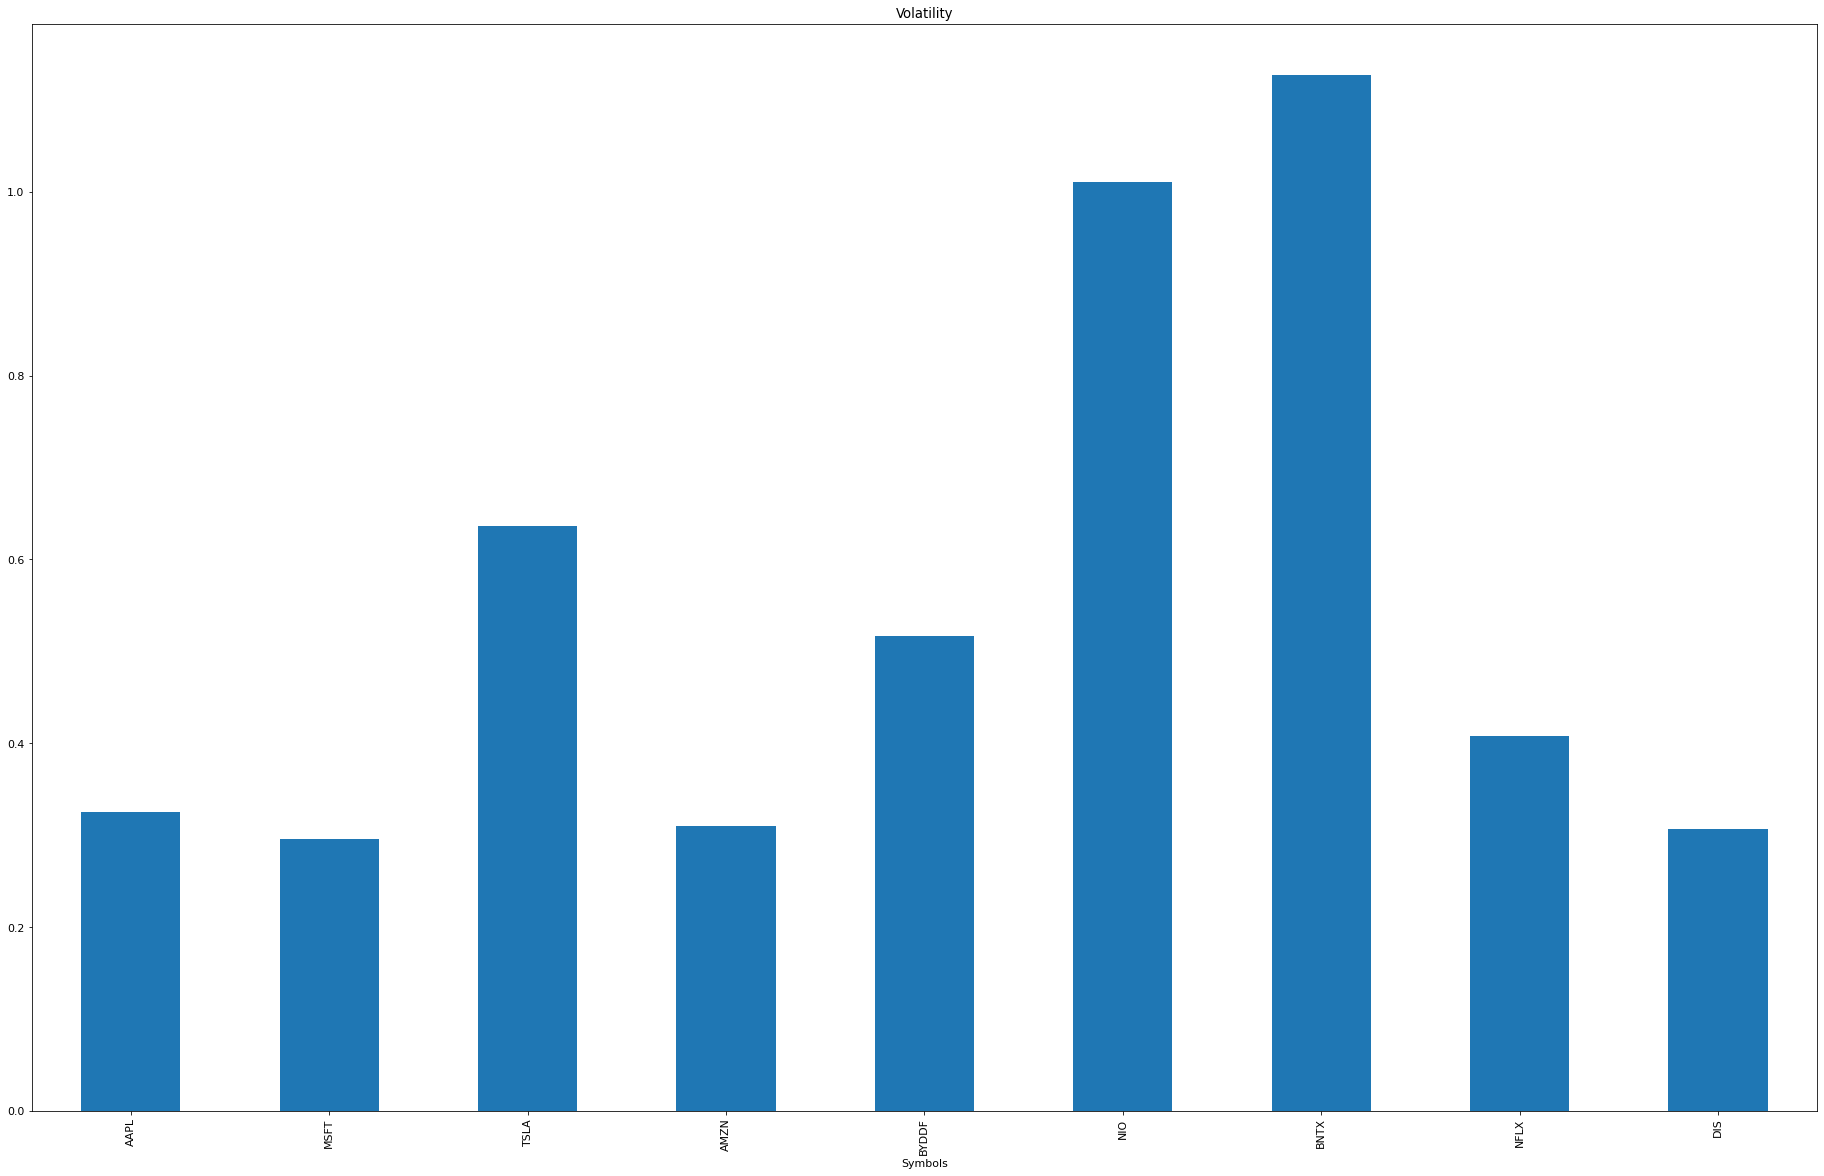

In [6]:
# Volatility
adj_price.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar', title="Volatility")

plt.savefig("volatility.png")

### Covariance

In [7]:
# Covariance
cov = log_stocks_data.cov()
print(cov)

Symbols      AAPL      MSFT      TSLA      AMZN     BYDDF       NIO      BNTX  \
Symbols                                                                         
AAPL     0.000424  0.000291  0.000359  0.000263  0.000229  0.000385  0.000288   
MSFT     0.000291  0.000349  0.000334  0.000268  0.000212  0.000319  0.000264   
TSLA     0.000359  0.000334  0.001621  0.000312  0.000409  0.000867 -0.000097   
AMZN     0.000263  0.000268  0.000312  0.000385  0.000192  0.000340  0.000184   
BYDDF    0.000229  0.000212  0.000409  0.000192  0.001066  0.000864  0.000222   
NIO      0.000385  0.000319  0.000867  0.000340  0.000864  0.004087  0.000336   
BNTX     0.000288  0.000264 -0.000097  0.000184  0.000222  0.000336  0.005079   
NFLX     0.000266  0.000277  0.000363  0.000330  0.000224  0.000343  0.000054   
DIS      0.000170  0.000174  0.000192  0.000120  0.000148  0.000210  0.000195   

Symbols      NFLX       DIS  
Symbols                      
AAPL     0.000266  0.000170  
MSFT     0.000277 

Assets can have a positive covariance, negative covariance, or no covariance:

- Positive covariance — when one asset increases in value, the other usually increases in value. The covariance value will be greater than 0.
- Negative covariance — when one asset increases in value, the other usually decreases in value. The covariance value will be less than 0.
- Uncorrelated assets — when there is no quantifiable pattern to the response of two assets. The covariance value is equal to 0.

### Correlation

Symbols      AAPL      MSFT      TSLA      AMZN     BYDDF       NIO      BNTX  \
Symbols                                                                         
AAPL     1.000000  0.757059  0.432497  0.651009  0.340688  0.258808  0.160515   
MSFT     0.757059  1.000000  0.444547  0.732324  0.348161  0.240456  0.160269   
TSLA     0.432497  0.444547  1.000000  0.394450  0.310848  0.303609 -0.027275   
AMZN     0.651009  0.732324  0.394450  1.000000  0.300233  0.250829  0.124111   
BYDDF    0.340688  0.348161  0.310848  0.300233  1.000000  0.381744  0.075951   
NIO      0.258808  0.240456  0.303609  0.250829  0.381744  1.000000  0.074198   
BNTX     0.160515  0.160269 -0.027275  0.124111  0.075951  0.074198  1.000000   
NFLX     0.501697  0.575630  0.349801  0.651618  0.266227  0.199647  0.028281   
DIS      0.427341  0.481369  0.246096  0.315869  0.233339  0.148502  0.105428   

Symbols      NFLX       DIS  
Symbols                      
AAPL     0.501697  0.427341  
MSFT     0.575630 

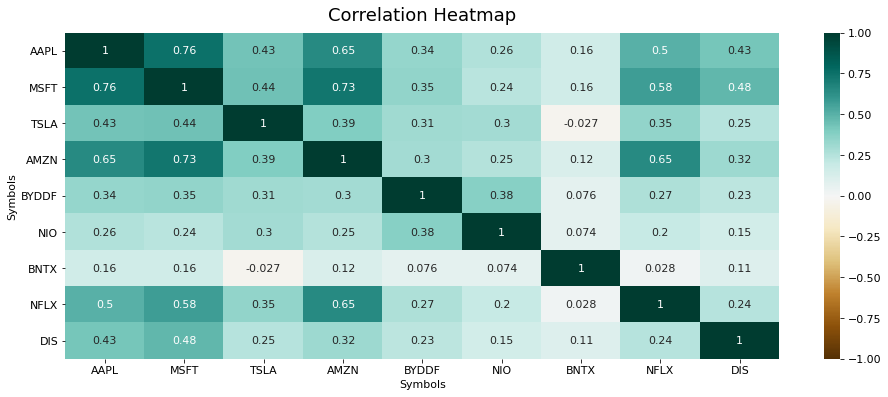

<Figure size 2304x1440 with 0 Axes>

In [16]:
# Correlation
corr = log_stocks_data.corr()
print(corr)
plt.figure(figsize=(16, 6))
corr_heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

plt.savefig("correlation_heatmap.jpg")

The Portfolio is not good diversified, since all stocks have a high correlation to each other. The AMZN/NFLX pair has the highest correlation with 0.959958. The AMZN/DIS pair has the lowest correlation with 0.532303. Also TSLA has a high correlation with BYDDF and NIO, although they come from two different markets (USA and China). 

But also you have to know, that this Portfolio was made, to gain high returns due to the Covid19-Crisis. So it's clear that this "temporary" Portfolio has a high correlation between its stocks.

## Optimized Portfolio

Perform a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should she allocate her funds across the portfolio? If she is more risky, how should she allocate her funds? Indicate multiple investment options at different risk levels and specify the returns.

In [9]:
# Define weights for allocation
w = [0.1, 0.1, 0.1, 0.05, 0.05, 0.2, 0.25, 0.03, 0.12]
e_r_ind = log_stocks_data.mean()
print(e_r_ind)

# Total expected return
e_r = (e_r_ind*w).sum()
print(e_r)

Symbols
AAPL     0.001219
MSFT     0.001311
TSLA     0.002202
AMZN     0.001166
BYDDF    0.001414
NIO      0.002721
BNTX     0.006487
NFLX     0.001112
DIS      0.000542
dtype: float64
0.0028665660398849995


### Weights

In [10]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'MSFT': 0.1, 'TSLA': 0.1, 'AMZN': 0.05, 'BYDDF': 0.05, 'NIO': 0.2, 'BNTX': 0.25, 'NFLX': 0.03, 'DIS': 0.12}
port_var = cov.mul(w, axis=0).mul(w, axis=1).sum().sum()
print(port_var)

0.0007561894863431233


###  Yearly and Portfolio returns

In [11]:
# Yearly returns for individual companies
ind_er = adj_price.resample('Y').last().pct_change().mean()
print(ind_er)

# Portfolio returns
port_w = [0.1, 0.1, 0.1, 0.05, 0.05, 0.2, 0.25, 0.03, 0.12]
port_er = (port_w*ind_er).sum()
print(port_er)

Symbols
AAPL     0.399589
MSFT     0.331580
TSLA     1.911097
AMZN     0.316350
BYDDF    0.940199
NIO      3.541384
BNTX     1.467422
NFLX     0.299337
DIS      0.152753
dtype: float64
1.4294968912643407


### Returns and Volatility

In [12]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = adj_price.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
print(ann_sd)

# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
print(assets)

Symbols
AAPL     0.325688
MSFT     0.295247
TSLA     0.636600
AMZN     0.310275
BYDDF    0.516331
NIO      1.010850
BNTX     1.126806
NFLX     0.407486
DIS      0.306242
dtype: float64
          Returns  Volatility
Symbols                      
AAPL     0.399589    0.325688
MSFT     0.331580    0.295247
TSLA     1.911097    0.636600
AMZN     0.316350    0.310275
BYDDF    0.940199    0.516331
NIO      3.541384    1.010850
BNTX     1.467422    1.126806
NFLX     0.299337    0.407486
DIS      0.152753    0.306242


### Efficient Frontier

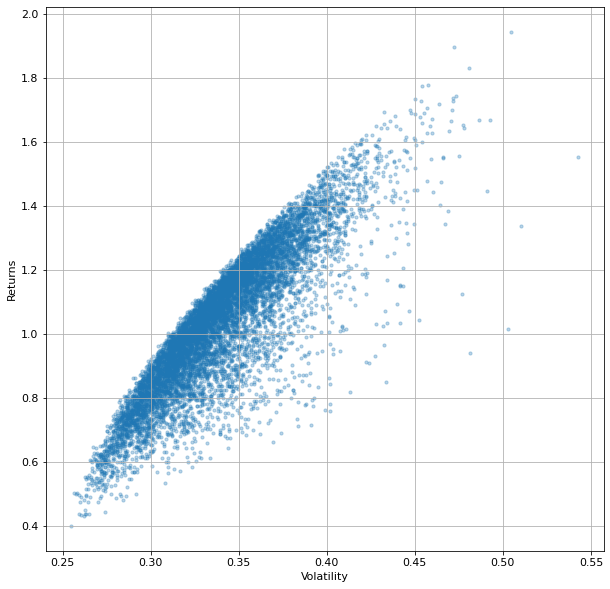

In [13]:
# Efficient Frontier
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(adj_price.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(adj_price.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios = pd.DataFrame(data)
portfolios.head(10) # Dataframe of the 10000 portfolios created

# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

plt.savefig("efficient_frontier.png")

### Minimum volatility portfolio

Returns         0.400492
Volatility      0.254680
AAPL weight     0.040908
MSFT weight     0.233390
TSLA weight     0.017171
AMZN weight     0.202636
BYDDF weight    0.102004
NIO weight      0.005802
BNTX weight     0.006703
NFLX weight     0.162127
DIS weight      0.229258
Name: 9533, dtype: float64


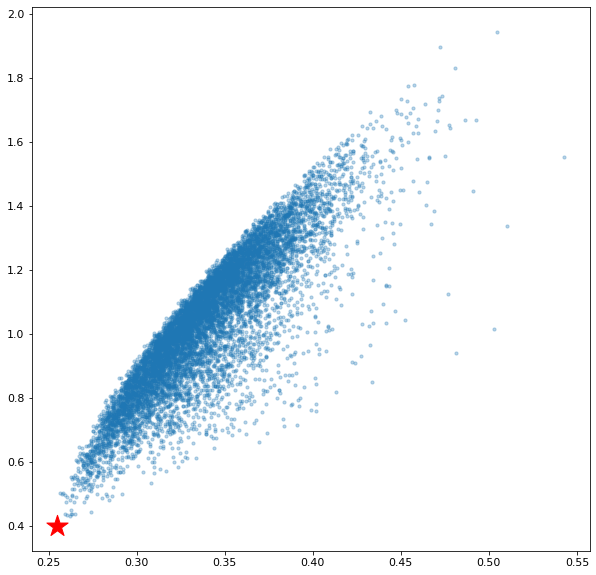

In [14]:
# Portfolio with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
print(min_vol_port)

# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

plt.savefig("e_f_min_vol.png")

### Optimal Portfolio

Returns         1.896687
Volatility      0.472166
AAPL weight     0.115004
MSFT weight     0.027741
TSLA weight     0.341871
AMZN weight     0.005393
BYDDF weight    0.042181
NIO weight      0.262418
BNTX weight     0.138678
NFLX weight     0.025992
DIS weight      0.040723
Name: 6255, dtype: float64


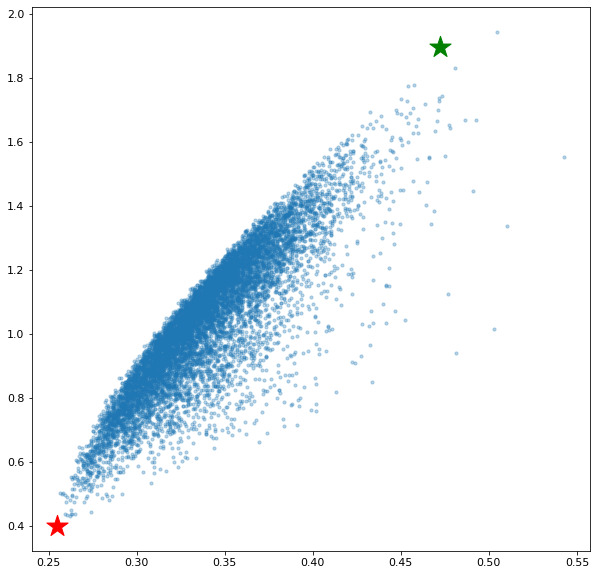

In [15]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
print(optimal_risky_port)

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

plt.savefig("e_f_opt_port.png")

## Create Your Presentation

We want to see:

- information about the stocks you utilized (industry, sector, background, news)
- the key financial statistics about the stocks and how you interpret them
- a few different portfolio options with the stock weights and why the investor would select that portfolio
- an overall conclusion to the client about your recommendations

In [17]:
"""
To Do's:
- search for other useful graphs about given data
- beautification of graphs
- information about stocks (industry, sector, background, news)
- statements after each calculation
- three different portfolio option - no risk, middle, 'high risk'
- graph of portfolio growth with all three portfolios - e.g. CHF 100'000
- putting all in a PDF Slideshow
"""

"\nTo Do's:\n- search for other useful graphs about given data\n- beautification of graphs\n- information about stocks (industry, sector, background, news)\n- statements after each calculation\n- three different portfolio option - no risk, middle, 'high risk'\n- graph of portfolio growth with all three portfolios - e.g. CHF 100'000\n- putting all in a PDF Slideshow\n"

## Share Your Presentation

1. Save your presentation as a Google Slide or some other presentation format
2. Post your presentation on the Codecademy forum. More details describing how to post your code can be found in the following informational.

Good luck!